In [8]:
'''
Title:  Darstellung der Messungen
Author: Kaufmann Stefan
Date:   08.05.2023
'''

# Requirements

# python 3.10.6

import numpy as np
import matplotlib.pyplot as plt
import libopc as libs  
import pandas as pd

# 1. Importieren der Messwerte

In [10]:
path = "Beispieldaten/"

# Import Files
Quanser_meas_file = pd.read_excel(path+"Quanser_meas.xlsx")
Quanser_obs_file  = pd.read_excel(path+"Quanser_obs.xlsx")

Quanser_meas_names = Quanser_meas_file.columns.tolist()
Quanser_obs_names = Quanser_obs_file.columns.tolist()


Quanser_meas = np.zeros_like(Quanser_meas_file)
for k in range(np.size(Quanser_meas_names)):
    Quanser_meas[:,k] =  Quanser_meas_file[Quanser_meas_names[k]]


Quanser_obs = np.zeros_like(Quanser_obs_file)
for k in range(np.size(Quanser_obs_names)):
    Quanser_obs[:,k] =  Quanser_obs_file[Quanser_obs_names[k]]


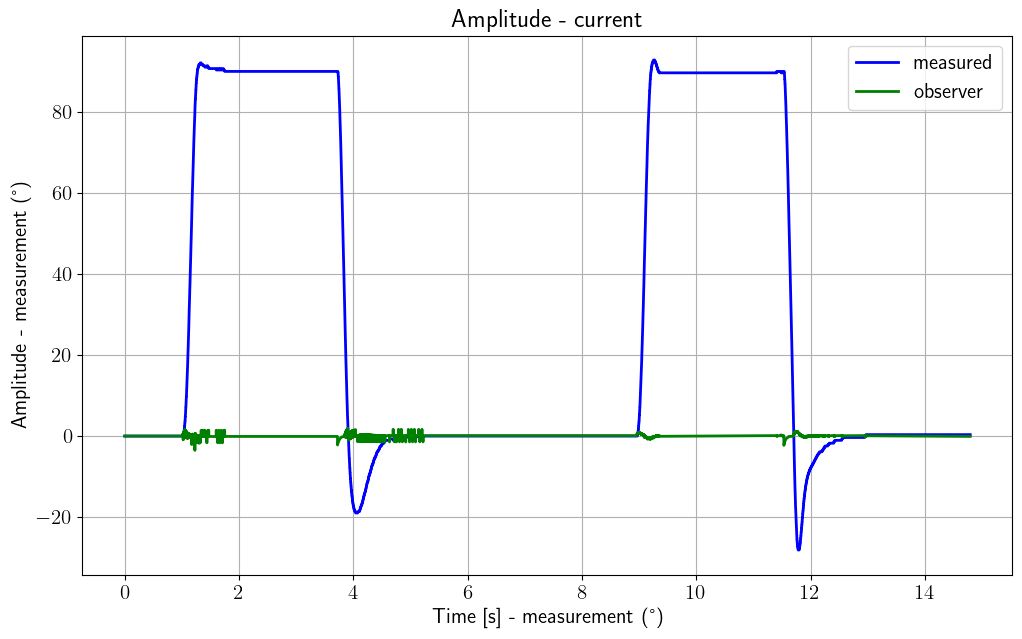

In [13]:
# Current in Grad

k = 2*0  # 0,1,2,3,4
plt.figure(figsize=(12,7))
plt.plot(Quanser_meas[:,k],Quanser_meas[:,k+1], 'b', linewidth ='2', label = 'measured')
plt.plot(Quanser_obs[:,k],Quanser_obs[:,k+1], 'g', linewidth ='2', label = 'observer')
plt.xlabel(Quanser_meas_names[k])
plt.ylabel(Quanser_meas_names[k+1])
plt.grid()
plt.title(Quanser_obs_names[k+1])
plt.legend(loc = 'best')

plt.show()

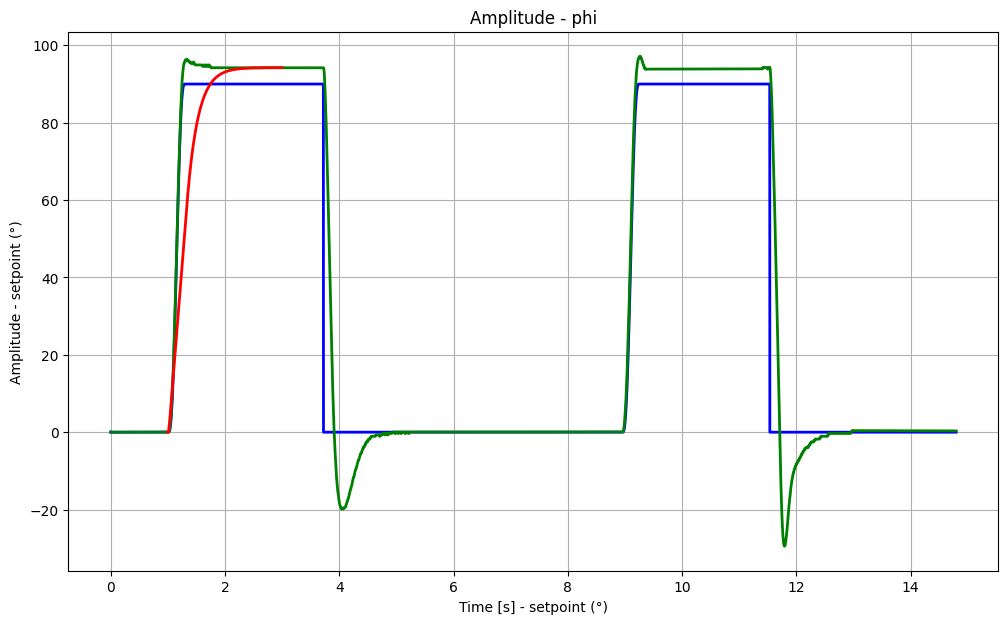

In [17]:
# Phi in Grad

k = 2*1  # 0,1,2,3,4
plt.figure(figsize=(12,7))
plt.plot(Quanser_meas[:,k],Quanser_meas[:,k+1], 'b', linewidth ='2', label = 'measured')
plt.plot(Quanser_obs[:,k],Quanser_obs[:,k+1]*60, 'g', linewidth ='2', label = 'observer')
plt.xlabel(Quanser_meas_names[k])
plt.ylabel(Quanser_meas_names[k+1])
plt.grid()
plt.title(Quanser_obs_names[k+1])
#plt.legend(loc = 'best')
plt.plot(t+1,[value * 60 for value in phi_1_ref], 'r', linewidth ='2', label = 'observer' )

plt.show()

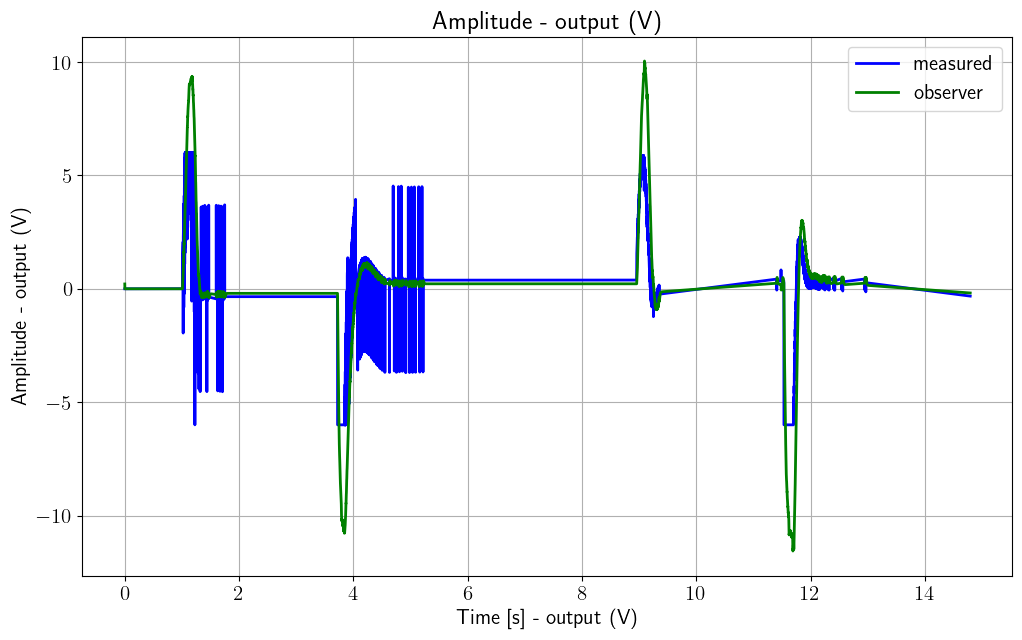

In [17]:
# Output in V
k = 2*2   # 0,1,2,3,4
plt.figure(figsize=(12,7))
plt.plot(Quanser_meas[:,k],Quanser_meas[:,k+1], 'b', linewidth ='2', label = 'measured')
plt.plot(Quanser_obs[:,k],Quanser_obs[:,k+1], 'g', linewidth ='2', label = 'observer')
plt.xlabel(Quanser_meas_names[k])
plt.ylabel(Quanser_meas_names[k+1])
plt.grid()
plt.title(Quanser_meas_names[k+1])
plt.legend(loc = 'best')

plt.show()


# 2. Importiern der Trajektorien 

In [1]:
with open("1_Daten/20230514__184823_Quad.txt", "r") as file:
    content = file.read()

start_index = content.index("[") + 1
end_index = content.index("]")
N = int(content[start_index:end_index])
print('Anzahl von Aufzählungen',N)

phi_1_ref   = [0.0] * N
omega_1_ref = [0.0] * N
i_ref = [0.0] * N
u_ref = [0.0] * N

index = 0
index2= 0
index3= 0
index4= 0
# Extract values from text
lines = content.split("\n")[8:]
for line in lines:   
    if "phi_1_ref[" in line and index <N-1:        
        index = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        phi_1_ref[index] = value
           
    if "omega_1_ref[" in line and index2 <N-1:           
        index2 = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        omega_1_ref[index2] = value
    
    if "i_ref[" in line and index3 <N-1:        
        index3 = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        omega_1_ref[index3] = value
    
    if "u_ref[" in line and index4 <N-1:        
        index4 = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        u_ref[index4] = value
    

Anzahl von Aufzählungen 251


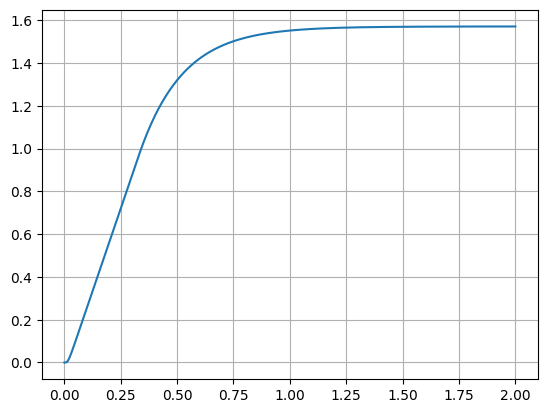

In [5]:
Tend = 2                      # Zeithorizont [s]
t = np.linspace(0,Tend,N,endpoint=True)  
plt.plot(t,phi_1_ref)
plt.grid()